# Analizaremos los factores de exito de IPO's 

In [887]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

In [888]:
df = pd.read_csv("IPODataFull.csv", low_memory=False,encoding='unicode_escape')
df.head()

,Symbol,DaysBetterThanSP,daysProfit,daysProfitGrouped,exactDiffernce,Year,Month,Day,dayOfWeek,closeDay0,...,usableCEOAge,usableCEOGender,usablePresidentAge,usablePresidentGender,FoundingDateGrouped,yearDifferenceGrouped,Profitable,Safe,HomeRunDay,HomeRun
0,A,122,249,200+,NaN,1999,11,18,3,28.6358,...,Blank,Blank,Blank,Blank,1951 - 2000,Unknown,1,0,77.0,1
1,AAC,131,262,200+,232.0,2014,10,2,3,18.5000,...,40 - 49,male,Blank,Blank,2011 - present,Unknown,1,1,NaN,0
2,AAOI,125,262,200+,6054.0,2013,9,26,3,9.9600,...,Blank,Blank,Blank,Blank,1951 - 2000,Unknown,1,0,NaN,0
3,AAP,128,261,200+,NaN,2001,11,29,3,13.9000,...,Blank,Blank,Blank,Blank,1901 - 1950,Unknown,1,0,NaN,0
4,AAT,123,127,100 - 149,181.0,2011,1,13,3,21.2500,...,Blank,Blank,Blank,Blank,2001 - 2010,Unknown,0,0,NaN,0


In [889]:
df.shape

(3762, 1664)

In [890]:
colnames = list(df.columns)
#colnames[1000:len(colnames)]

# Separamos el DF principal en dos partes:
# 1. 'main': variables no referentes a precios
# 2. 'prices': variables referentes precios

In [891]:
close_day_0 = df.columns.get_loc('closeDay0')
name = df.columns.get_loc('Name')

print(close_day_0)
print(volume_day_261)

df_prices = df.iloc[:,close_day_0:name]

colname_symbol = (df.columns[df.columns.get_loc('Symbol')])

df_prices.insert(0, colname_symbol, df['Symbol'])
df_prices['HomeRunDay'] = df['HomeRunDay']
df_prices['HomeRun']=df['HomeRun']
#df_prices

9
1318


In [892]:
df_main = df.drop(df.columns[close_day_0:name], axis=1)
df_main = df_main.drop(df.columns[-2:], axis=1)
#df_main

In [893]:
print(df_prices.shape)
print(df_main.shape)

(3762, 1313)
(3762, 352)


# Seleccion de Variables del "df_main"

In [894]:
df_main_columns = df_main.columns.to_list
#df_main_columns

In [895]:
main_variables = []
for col_name in df_main.columns: 
    #print(col_name)
    main_variables.append(col_name)

In [896]:
# Variables que idealmente quisieramos usar. Lamentablemente no todas tienen mas de 2000 datos
ideal_variables = ['Symbol', 'DaysBetterThanSP','daysProfit', 'Year', 'Month', 'Day', 'dayOfWeek', 'MarketCap', 'Sector', 'Industry',
                      'CEOAge','CEOGender', 'CEOInChargeDuringIPO','City','stateCountry', 'Revenue', 'netIncome',' lastFiscalYearGrowth ',
                      'employees','YearFounded','Total_revenuesYearBeforeIPO','Operating_incomeYearBeforeIPO', 'EBITDAYearBeforeIPO','Net_incomeYearBeforeIPO','Profitable','Net_cash_used_for_investing_activitiesYearBeforeIPO',
                      'Other_financing_activitiesYearBeforeIPO','Cash_and_cash_equivalentsYearBeforeIPO','Total_stockholders_equityYearBeforeIPO',
                      'Retained_earningsYearBeforeIPO','Common_stock_repurchasedYearBeforeIPO','Debt_repaymentYearBeforeIPO','Long-term_debt_repaymentYearBeforeIPO','Long-term_debt_issuedYearBeforeIPO','Long-term_debtYearBeforeIPO',
                      'Debt_issuedYearBeforeIPO','Debt_securitiesYearBeforeIPO','Short-term_debtYearBeforeIPO','LoansYearBeforeIPO','Net_loansYearBeforeIPO',
                       'Repurchases_of_treasury_stockYearBeforeIPO','Dividend_paidYearBeforeIPO','Market6MonthTrend','MarketYearTrend']
                      

In [897]:
df_main_nrows = df_main.shape[0]
df_main_nrows

3762

In [898]:
# Identificamos las variables con pocos datos
na_s = df_main[main_variables].isna().sum()

short_columns = []
for i in range(0, len(na_s)):
    if na_s[i] > (df_main_nrows - 2000):
        short_columns.append(na_s.index[i])
        
#print(short_columns)
print(len(short_columns))

303


In [899]:
# Retiramos las variables con menos de 2000 datos, son 303 de 352
df_main_clean = df_main.drop(short_columns, axis=1)
# print(df_main_clean.head())
df_main_clean.shape

(3762, 49)

In [900]:
# Visualizamos las variables restantes y elegimos las que mejor podrian explicar el valor de una IPO
df_main_clean.columns
selected_variables = ['Symbol','Name','DaysBetterThanSP', 'daysProfit','Year','Month','Day', 'dayOfWeek', 'LastSale', 'MarketCap', 'Sector',
       'Industry', 'Summary Quote','CEOTakeOver', 'CEOAge','CEOGender', 'CEOInChargeDuringIPO','City', 'stateCountry', 'FiscalDateEnd',
       'Revenue', 'netIncome', 'employees', 'YearFounded','Market6MonthTrend', 'MarketYearTrend', 'employeesGrouped',
       'USACompany', 'FiscalMonth','Profitable', 'Safe']

In [901]:
df_main_clean = df_main_clean[selected_variables]

# Encontramos caracteristicas del DF 'prices'
## 1. Reemplazamos los nan

In [902]:
df_prices.head()

,Symbol,closeDay0,highDay0,openDay0,lowDay0,volumeDay0,closeDay1,highDay1,openDay1,lowDay1,...,openDay260,lowDay260,volumeDay260,closeDay261,highDay261,openDay261,lowDay261,volumeDay261,HomeRunDay,HomeRun
0,A,28.6358,33.5207,27.3725,30.6572,59753154.0,27.2040,28.9727,26.8253,28.9323,...,27.7936,28.9323,2944860.0,31.9205,31.9629,29.6465,29.6465,8351788.0,77.0,1
1,AAC,18.5000,20.1000,17.6000,20.0000,2799073.0,18.6500,18.7500,18.0500,18.2000,...,22.1100,22.2700,197468.0,24.4300,24.4800,22.4200,22.4200,295123.0,NaN,0
2,AAOI,9.9600,10.0900,9.3700,10.0000,948999.0,10.1000,10.4400,10.0000,10.4400,...,16.9100,17.7300,177655.0,16.8100,17.1000,16.5700,16.9300,230281.0,NaN,0
3,AAP,13.9000,14.4667,13.3833,13.4000,371100.0,14.2834,14.2834,13.9000,13.9000,...,16.7000,16.7000,0.0,17.1830,17.5500,17.0000,17.4300,553200.0,NaN,0
4,AAT,21.2500,22.0000,21.1800,21.5300,15536889.0,21.3100,21.4500,21.1600,21.1600,...,20.0900,20.8000,142910.0,20.6900,20.7100,20.2000,20.2000,87872.0,NaN,0


In [903]:
# Para reemplazar los nan con valores de dias anteriores es necesario que sean de la misma medicion
df_closeDay_prices = df_prices.loc[:, df_prices.columns.str.contains('closeDay')]
df_highDay_prices = df_prices.loc[:, df_prices.columns.str.contains('highDay')]
df_openDay_prices = df_prices.loc[:, df_prices.columns.str.contains('openDay')]
df_lowDay_prices = df_prices.loc[:, df_prices.columns.str.contains('lowDay')]
df_volumeDay_prices = df_prices.loc[:, df_prices.columns.str.contains('volumeDay')]

In [904]:
# Convertimos los DF en Arrays para reemplazar mas facilmente el 'nan' por el valor anterior

array_close_prices = df_closeDay_prices.to_numpy()
array_high_prices = df_highDay_prices.to_numpy()
array_open_prices = df_openDay_prices.to_numpy()
array_low_prices = df_lowDay_prices.to_numpy()
array_volume_prices = df_volumeDay_prices.to_numpy()


def nan_replacer(num_array):
    nan_location_array = np.where(np.isnan(num_array))
    counter_row = -1
    for i in num_array:
        counter_row += 1
        if counter_row in nan_location_array[0]:
            nans.append(counter)
            counter_col = -1

            for j in i:
                counter_col += 1
                if np.isnan(j):
                    num_array[counter_row, counter_col] = num_array[counter_row -1, counter_col-1]

In [905]:
nan_replacer(array_close_prices)
nan_replacer(array_low_prices)
nan_replacer(array_open_prices)
nan_replacer(array_low_prices)
nan_replacer(array_volume_prices)

## 2. Insertamos la Media, Mediana y Desviacion Estandar en los DF

In [906]:
# Convertimos los arrays sin nan's en DF para efectuar los calculos

df_closeDay_prices_clean = pd.DataFrame(array_close_prices, columns=df_closeDay_prices.columns)
df_highDay_prices_clean = pd.DataFrame(array_high_prices, columns=df_highDay_prices.columns)
df_openDay_prices_clean = pd.DataFrame(array_open_prices, columns=df_openDay_prices.columns)
df_lowDay_prices_clean = pd.DataFrame(array_low_prices, columns=df_lowDay_prices.columns)
df_volumeDay_prices_clean = pd.DataFrame(array_volume_prices, columns=df_volumeDay_prices.columns)

In [907]:
def statistical_characteristics(df_day_prices_clean):
    df_day_prices_clean["Mean"] = df_day_prices_clean.mean(axis = 1)
    df_day_prices_clean["Median"] = df_day_prices_clean.median(axis = 1)
    df_day_prices_clean["Stan Dev."] = df_day_prices_clean.std(axis = 1)

In [908]:
statistical_characteristics(df_closeDay_prices_clean)
statistical_characteristics(df_highDay_prices_clean)
statistical_characteristics(df_openDay_prices_clean)
statistical_characteristics(df_lowDay_prices_clean)
statistical_characteristics(df_volumeDay_prices_clean)

## 3.Visualizamos Variables del Main

In [909]:
df_main_clean.head()

,Symbol,Name,DaysBetterThanSP,daysProfit,Year,Month,Day,dayOfWeek,LastSale,MarketCap,...,netIncome,employees,YearFounded,Market6MonthTrend,MarketYearTrend,employeesGrouped,USACompany,FiscalMonth,Profitable,Safe
0,A,"Agilent Technologies, Inc.",122,249,1999,11,18,3,68.17,2.198323e+10,...,$684.00M,13500,1999.0,2.312974,2.039844,>10000,Yes,Oct,1,0
1,AAC,"AAC Holdings, Inc.",131,262,2014,10,2,3,11.07,2.707691e+08,...,$-20.58M,2100,2014.0,0.138536,0.881839,1001 - 5000,Yes,Dec,1,1
2,AAOI,"Applied Optoelectronics, Inc.",125,262,2013,9,26,3,29.97,5.844368e+08,...,$73.95M,3054,1997.0,1.286165,1.443672,1001 - 5000,Yes,Dec,1,0
3,AAP,Advance Auto Parts Inc,128,261,2001,11,29,3,106.45,7.874971e+09,...,$475.51M,71000,1929.0,-0.128110,-0.745906,>10000,Yes,Dec,1,0
4,AAT,"American Assets Trust, Inc.",123,127,2011,1,13,3,34.00,1.604956e+09,...,$29.08M,194,2010.0,1.813736,2.263666,101 - 500,Yes,Dec,0,0


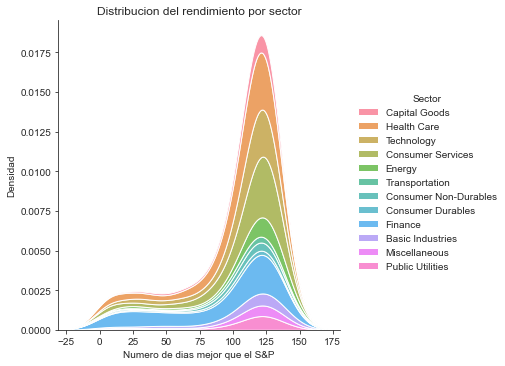

In [910]:
ax = sns.displot(data=df_main_clean, x='DaysBetterThanSP', kind='kde', hue='Sector', fill=True, multiple='stack')
ax.set(xlabel='Numero de dias mejor que el S&P', ylabel='Densidad', title='Distribucion del rendimiento por sector')

In [911]:
def add_mean_line(data, var=None, **kws):
    
    if not var: return
    
    m = np.mean(data[var])
    
    m = round(m)
    
    ax = plt.gca()
    
    ax.axvline(m, color='#920900', lw=3, ls='--')
    
    x_pos=0.85
    ax.text(x_pos, 0.9, f'mean ={m}',
                transform=ax.transAxes, 
                color='black', fontweight='bold', fontsize=12)

In [912]:
def add_median_line(data, var=None, **kws):
    group_median = []
    if not var: return
    
    m = np.median(data[var])
    
    m = round(m)
    
    ax = plt.gca()
    
    ax.axvline(m, color='grey', lw=3, ls=':')
    
    x_pos=0.85
    ax.text(x_pos, 0.8, f'median ={m}',
                transform=ax.transAxes, 
                color='grey', fontweight='bold', fontsize=10)

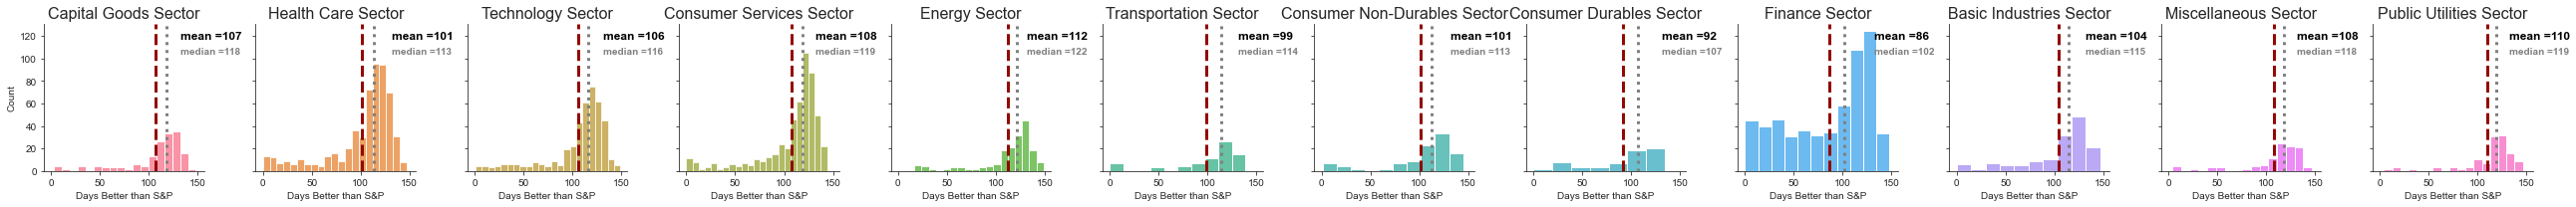

In [1012]:
g = sns.FacetGrid(data=df_main_clean, hue='Sector', col='Sector')
g.map_dataframe(sns.histplot, x="DaysBetterThanSP")
g.map_dataframe(add_mean_line, var="DaysBetterThanSP")
g.map_dataframe(add_median_line, var="DaysBetterThanSP")
g.set_axis_labels('Days Better than S&P')
g.set_titles(col_template='{col_name} Sector', size=16)

g.tight_layout()

# Hacer doble click en el grafico para agrandar la imagen

In [973]:
def calc_category(df, category, func):
    category_calc = []
    category = category.tolist()
    for i in range(0, len(category)):
        df2 = df[df["Sector"]==category[i]]
        category_calc.append(func(df2["DaysBetterThanSP"]))

    return category_calc

In [969]:
sector = df_main_clean.Sector.unique()

In [1023]:
sector_mean = calc_category(df_main_clean, sector, np.mean)
sector_median = calc_category(df_main_clean, sector, np.median)
sector_std = calc_category(df_main_clean, sector, np.std)

df_sector_calc = pd.DataFrame()
df_sector_calc["Sector"] = sector
df_sector_calc["Mean Days over S&P"] = sector_mean
df_sector_calc["Median Days over S&P"] = sector_median
df_sector_calc["Stan Dev. Days over S&P"] = sector_std
df_sector_calc = df_sector_calc[df_sector_calc['Sector'].notna()]
df_sector_calc

C:\Users\FRANCOGCC\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\FRANCOGCC\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Sector,Mean Days over S&P,Median Days over S&P,Stan Dev. Days over S&P
0,Capital Goods,106.658385,118.0,31.050971
1,Health Care,101.171076,113.0,33.863675
2,Technology,106.380723,116.0,30.134552
3,Consumer Services,107.741811,119.0,31.655096
4,Energy,111.733333,122.0,31.188958
5,Transportation,98.733333,114.0,37.963608
7,Consumer Non-Durables,100.519231,113.0,36.957091
8,Consumer Durables,92.491803,107.0,36.768939
9,Finance,85.603066,102.0,43.150316
10,Basic Industries,104.041379,115.0,35.998635


#### Lo que muestra el gráfico y la tabla es que la cantidad de días sobre el S&P 500 por sector del promedio es menor a la mediana. Es decir, existe un sesgo a la izquierda y en ese mismo sector se encuantra una cola de datos que incluso llegan a ser negativos. Esto hace que la media sea más baja que la mediana.

#### En el caso de la desviación estándar, el sector con menor desviación estándar es el de 'Public Utilities'. Además, es el que tiene segunda mejor media y mediana. Estas medidas posiblemente se deban a características propias del sector: barreras de entrada muy altas (son monopolio u oligopolios debido a leyes/conceciones) lo cual permite ampliar márgenes (cobrar más ya que no hay competidores), resultando en mayores EPS y así mismo no tener el peligro de que otras compañías te quiten cuota de mercado.

In [989]:
df_main_clean.head()

,Symbol,Name,DaysBetterThanSP,daysProfit,Year,Month,Day,dayOfWeek,LastSale,MarketCap,...,netIncome,employees,YearFounded,Market6MonthTrend,MarketYearTrend,employeesGrouped,USACompany,FiscalMonth,Profitable,Safe
0,A,"Agilent Technologies, Inc.",122,249,1999,11,18,3,68.17,2.198323e+10,...,$684.00M,13500,1999.0,2.312974,2.039844,>10000,Yes,Oct,1,0
1,AAC,"AAC Holdings, Inc.",131,262,2014,10,2,3,11.07,2.707691e+08,...,$-20.58M,2100,2014.0,0.138536,0.881839,1001 - 5000,Yes,Dec,1,1
2,AAOI,"Applied Optoelectronics, Inc.",125,262,2013,9,26,3,29.97,5.844368e+08,...,$73.95M,3054,1997.0,1.286165,1.443672,1001 - 5000,Yes,Dec,1,0
3,AAP,Advance Auto Parts Inc,128,261,2001,11,29,3,106.45,7.874971e+09,...,$475.51M,71000,1929.0,-0.128110,-0.745906,>10000,Yes,Dec,1,0
4,AAT,"American Assets Trust, Inc.",123,127,2011,1,13,3,34.00,1.604956e+09,...,$29.08M,194,2010.0,1.813736,2.263666,101 - 500,Yes,Dec,0,0


In [1014]:
def calc_marketcap(df, category, func):
    category_calc = []
    category = category.tolist()
    for i in range(0, len(category)):
        df2 = df[df["Sector"]==category[i]]
        category_calc.append(func(df2["MarketCap"]))

    return category_calc

In [1030]:
sector_market_cap_mean = calc_marketcap(df_main_clean, sector, np.mean)
df_sector_market_cap = pd.DataFrame()
df_sector_market_cap["Sector"] = sector
df_sector_market_cap["Mean Market Cap"] = sector_market_cap_mean
df_sector_market_cap = df_sector_market_cap[df_sector_market_cap['Sector'].notna()]
df_sector_market_cap

,Sector,Mean Market Cap
0,Capital Goods,4.376460e+09
1,Health Care,2.365634e+09
2,Technology,9.465153e+09
3,Consumer Services,5.262393e+09
4,Energy,7.057674e+09
5,Transportation,4.130364e+09
7,Consumer Non-Durables,8.658642e+09
8,Consumer Durables,2.370714e+09
9,Finance,4.091254e+09
10,Basic Industries,3.926533e+09


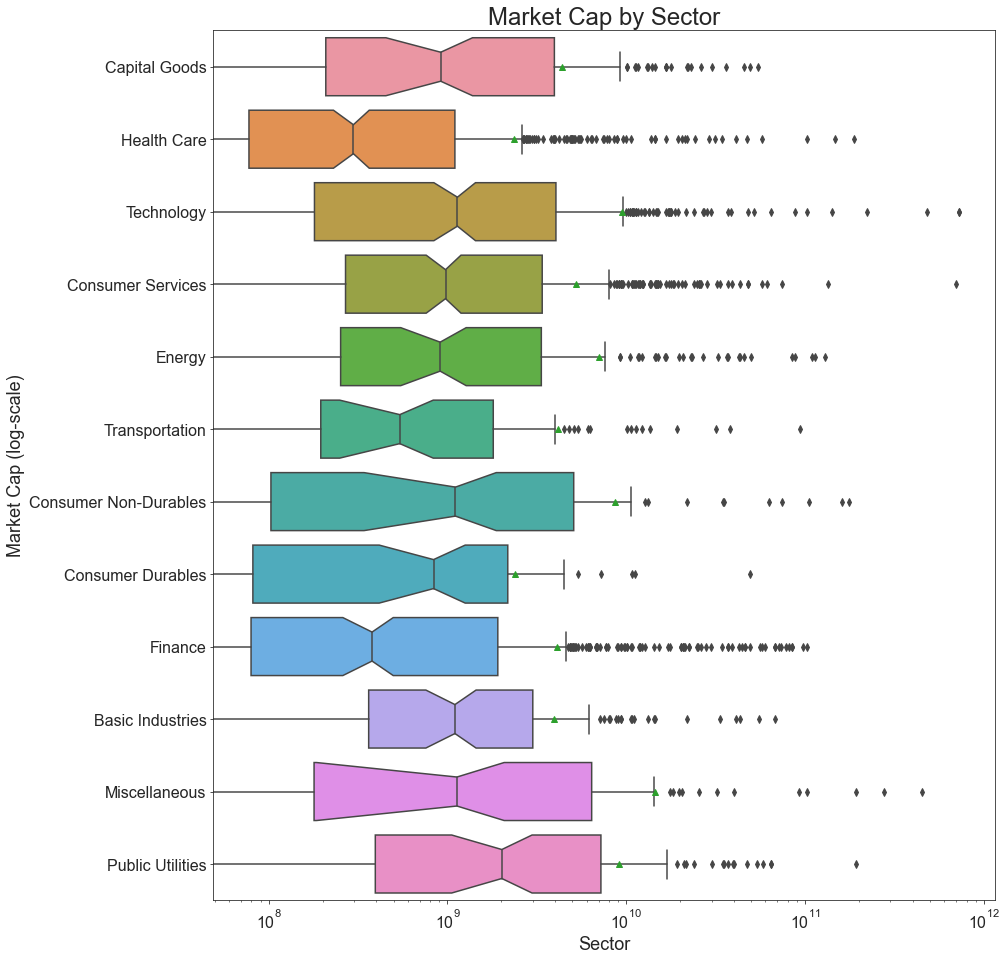

In [1051]:
fig, ax = plt.subplots(figsize=(14, 16))

g = sns.boxplot(ax=ax, x='MarketCap', y='Sector', data=df_main_clean, notch=True, showmeans=True)
g.set(xscale='log')
g.axes.set_title("Market Cap by Sector",fontsize=24)
g.set_xlabel("Sector",fontsize=18)
g.set_ylabel("Market Cap (log-scale)",fontsize=18)
g.tick_params(axis='both', which='major', labelsize=16)


#### El gráfico de cajas muestra  la capitalización de mercado de empresas de diferentes sectores y permite distinguir los sectores donde hay mayor concentración en cuanto al valor en las compañías, de aquellos donde se encuentran compañías de todo tipo de tamaño. Por ejemplo, Health Care suele tener capitalizaciones bajas respecto a sectores como Capital Goods.

#### Esta información es importante para un fondo de inversión ya que el fondo puede comprar acciones de acuerdo a la liquidez de la compañía (cantidad de acciones cotizando por día). Si un sector suele tener compañías pequeñas, un fondo grande sabrá que deberá centrarse en las pocas compañías de bastante capitalización, o decidir mejor invertir en otro sector.

#### Además, la media se ubica en el cuartil más alto en todos los sectores (ver triángulo verde), indicando que unas pocas compañías concentran el dinero en todos los sectores. Esto evidentemente varía en grado por sector y puede ser una forma de identificar a simple vista la concetración de cuota de mercado en un sector.

## 4. Visualizamos Variables de Prices